In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("./Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig

Using TensorFlow backend.
./Scripts/plotseqlogo.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
./Scripts/plotseqlogo.py:42: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
### library to use R
%load_ext rpy2.ipython
%load_ext rmagic

/anaconda3/lib/python3.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
# add the absolute path of Data Directory to path_to_data
path_to_data = "Multi-resBind/Data/"
path_to_data_low = path_to_data + "data_RBPslow.h5"
path_to_data_med = path_to_data + "data_RBPsmed.h5"
path_to_data_high = path_to_data + "data_RBPshigh.h5"
X_test_seq_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_data_low)
X_test_seq_med, X_test_region_med, y_test_RBP_med, y_test_name_med, y_train_med = load_data(path_to_data_med)
X_test_seq_high, X_test_region_high, y_test_RBP_high, y_test_name_high, y_train_high = load_data(path_to_data_high)
print (X_test_seq_low.shape)
print (X_test_region_low.shape)
print (y_test_RBP_low.shape)
print (y_train_low.shape)
print (X_test_seq_med.shape)
print (X_test_region_med.shape)
print (y_test_RBP_med.shape)
print (y_train_med.shape)
print (X_test_seq_high.shape)
print (X_test_region_high.shape)
print (y_test_RBP_high.shape)
print (y_train_high.shape)

(7969, 150, 4)
(7969, 250, 4)
(7969, 27)
(56547, 27)
(42505, 150, 4)
(42505, 250, 4)
(42505, 21)
(298301, 21)
(192197, 150, 4)
(192197, 250, 4)
(192197, 11)
(1346145, 11)


In [4]:
concat_low= np.concatenate((X_test_seq_low, X_test_region_low[:, 50:200, :]), axis=2)
print (concat_low.shape)
concat_med= np.concatenate((X_test_seq_med, X_test_region_med[:, 50:200, :]), axis=2)
print (concat_med.shape)
concat_high= np.concatenate((X_test_seq_high, X_test_region_high[:, 50:200, :]), axis=2)
print (concat_high.shape)

(7969, 150, 8)
(42505, 150, 8)
(192197, 150, 8)


In [5]:
#load models and obtain prediction and integrated_gradients
path_to_model = "Multi-resBind/results/multi_resBind_vs_DeepRiPe/"
path_to_model_deepripe_low= path_to_model + "DeepRiPe_low_model.h5"
path_to_model_resbind_low= path_to_model + "m_resbind_low_model.h5"
path_to_model_deepripe_med= path_to_model + "DeepRiPe_med_model.h5"
path_to_model_resbind_med= path_to_model + "m_resbind_med_model.h5"
path_to_model_deepripe_high= path_to_model + "DeepRiPe_high_model.h5"
path_to_model_resbind_high= path_to_model + "m_resbind_high_model.h5" 
print (path_to_model_resbind_med)
print (path_to_model_resbind_high)

./m_resbind_med_model.h5
./m_resbind_high_model.h5


In [6]:
model_deepripe_low =load_model(path_to_model_deepripe_low, custom_objects={'precision': precision,'recall': recall }) 
pred_deepripe_low = model_deepripe_low.predict([X_test_seq_low, X_test_region_low])
model_resbind_low=load_model(path_to_model_resbind_low, custom_objects={'precision': precision,'recall': recall }) 
pred_resbind_low=model_resbind_low.predict(concat_low)
model_deepripe_med =load_model(path_to_model_deepripe_med, custom_objects={'precision': precision,'recall': recall }) 
pred_deepripe_med = model_deepripe_med.predict([X_test_seq_med, X_test_region_med])
model_resbind_med=load_model(path_to_model_resbind_med, custom_objects={'precision': precision,'recall': recall }) 
pred_resbind_med=model_resbind_med.predict(concat_med)
model_deepripe_high =load_model(path_to_model_deepripe_high, custom_objects={'precision': precision,'recall': recall }) 
pred_deepripe_high = model_deepripe_high.predict([X_test_seq_high, X_test_region_high])
model_resbind_high=load_model(path_to_model_resbind_high, custom_objects={'precision': precision,'recall': recall }) 
pred_resbind_high=model_resbind_high.predict(concat_high)

Instructions for updating:
Colocations handled automatically by placer.


2021-03-24 15:40:01,920 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


2021-03-24 15:40:02,606 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [7]:
#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])
RBPnames_med=np.array(['TARDBP', 'ELAVL2', 'ELAVL3', 'ELAVL4', 'RBM20', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'EWSR1', 'HNRNPD', 'RBPMS', 'SRRM4', 'AGO2', 'NUDT21', 'FIP1L1', 'CAPRIN1', 'FMR1iso7', 'FXR2', 'AGO1', 'L1RE1', 'ORF1'])
RBPnames_high=np.array(['DND1', 'CPSF7', 'CPSF6', 'CPSF1', 'CSTF2', 'CSTF2T', 'ZC3H7B', 'FMR1iso1', 'RBM10', 'MOV10', 'ELAVL1'])

#number of tasks for each model
num_task_high=len(RBPnames_high)
num_task_med=len(RBPnames_med)
num_task_low=len(RBPnames_low)

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib

In [9]:
y_true_low=y_test_RBP_low
type(y_true_low) == np.ndarray
y_pred_deepripe_low= pred_deepripe_low
y_pred_resbind_low = pred_resbind_low
num_task_low = 27
print (num_task_low)
print (len(RBPnames_low))

27
27


In [10]:
y_true_med=y_test_RBP_med
type(y_true_med) == np.ndarray
y_pred_deepripe_med= pred_deepripe_med
y_pred_resbind_med = pred_resbind_med
num_task_med = 21
print (num_task_med)
print (len(RBPnames_med))

21
21


In [11]:
y_true_high=y_test_RBP_high
type(y_true_high) == np.ndarray
y_pred_deepripe_high= pred_deepripe_high
y_pred_resbind_high = pred_resbind_high
num_task_high = 11
print (num_task_high)
print (len(RBPnames_high))

11
11


In [12]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true_low[:, i],y_pred_deepripe_low[:, i])
    average_precision_low[i] = average_precision_score(y_true_low[:, i], y_pred_deepripe_low[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true_low[:, i], y_pred_deepripe_low[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_deepripe_low = average_precision_low
roc_auc_deepripe_low = roc_auc_low
print (np.mean(average_precision_deepripe_low))
print (np.mean(roc_auc_deepripe_low))

0.33142920105566426
0.8752383853700605


In [13]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true_low[:, i],y_pred_resbind_low[:, i])
    average_precision_low[i] = average_precision_score(y_true_low[:, i], y_pred_resbind_low[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true_low[:, i], y_pred_resbind_low[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_resbind_low = average_precision_low
roc_auc_resbind_low = roc_auc_low
print (np.mean(average_precision_resbind_low))
print (np.mean(roc_auc_resbind_low))

0.38084524509396583
0.897584452672511


In [14]:
precision_med = l = [None] * len(RBPnames_med)
recall_med = [None] * len(RBPnames_med)
average_precision_med = [None] * len(RBPnames_med)

fpr_med = [None] * len(RBPnames_med)
tpr_med = [None] * len(RBPnames_med)
roc_auc_med = [None] * len(RBPnames_med)
pr_auc_med = [None] * len(RBPnames_med)

for i in range(num_task_med):
    precision_med[i], recall_med[i], _ = precision_recall_curve(y_true_med[:, i],y_pred_deepripe_med[:, i])
    average_precision_med[i] = average_precision_score(y_true_med[:, i], y_pred_deepripe_med[:, i])
    pr_auc_med [i]= auc(recall_med[i],precision_med[i])
    fpr_med[i], tpr_med[i], _ = roc_curve(y_true_med[:, i], y_pred_deepripe_med[:, i])
    roc_auc_med[i] = auc(fpr_med[i], tpr_med[i])
average_precision_deepripe_med = average_precision_med
roc_auc_deepripe_med = roc_auc_med
print (np.mean(average_precision_deepripe_med))
print (np.mean(roc_auc_deepripe_med))

0.4516306295457091
0.8778900467413796


In [15]:
precision_med = l = [None] * len(RBPnames_med)
recall_med = [None] * len(RBPnames_med)
average_precision_med = [None] * len(RBPnames_med)

fpr_med = [None] * len(RBPnames_med)
tpr_med = [None] * len(RBPnames_med)
roc_auc_med = [None] * len(RBPnames_med)
pr_auc_med = [None] * len(RBPnames_med)

for i in range(num_task_med):
    precision_med[i], recall_med[i], _ = precision_recall_curve(y_true_med[:, i],y_pred_resbind_med[:, i])
    average_precision_med[i] = average_precision_score(y_true_med[:, i], y_pred_resbind_med[:, i])
    pr_auc_med [i]= auc(recall_med[i],precision_med[i])
    fpr_med[i], tpr_med[i], _ = roc_curve(y_true_med[:, i], y_pred_resbind_med[:, i])
    roc_auc_med[i] = auc(fpr_med[i], tpr_med[i])
average_precision_resbind_med = average_precision_med
roc_auc_resbind_med = roc_auc_med
print (np.mean(average_precision_resbind_med))
print (np.mean(roc_auc_resbind_med))

0.48263534881490144
0.888945389475466


In [16]:
precision_high = l = [None] * len(RBPnames_high)
recall_high = [None] * len(RBPnames_high)
average_precision_high = [None] * len(RBPnames_high)

fpr_high = [None] * len(RBPnames_high)
tpr_high = [None] * len(RBPnames_high)
roc_auc_high = [None] * len(RBPnames_high)
pr_auc_high = [None] * len(RBPnames_high)

for i in range(num_task_high):
    precision_high[i], recall_high[i], _ = precision_recall_curve(y_true_high[:, i],y_pred_deepripe_high[:, i])
    average_precision_high[i] = average_precision_score(y_true_high[:, i], y_pred_deepripe_high[:, i])
    pr_auc_high [i]= auc(recall_high[i],precision_high[i])
    fpr_high[i], tpr_high[i], _ = roc_curve(y_true_high[:, i], y_pred_deepripe_high[:, i])
    roc_auc_high[i] = auc(fpr_high[i], tpr_high[i])
average_precision_deepripe_high = average_precision_high
roc_auc_deepripe_high = roc_auc_high
print (np.mean(average_precision_deepripe_high))
print (np.mean(roc_auc_deepripe_high))

0.42732194761733344
0.8312270036303743


In [17]:
precision_high = l = [None] * len(RBPnames_high)
recall_high= [None] * len(RBPnames_high)
average_precision_high = [None] * len(RBPnames_high)

fpr_high = [None] * len(RBPnames_high)
tpr_high = [None] * len(RBPnames_high)
roc_auc_high = [None] * len(RBPnames_high)
pr_auc_high = [None] * len(RBPnames_high)

for i in range(num_task_high):
    precision_high[i], recall_high[i], _ = precision_recall_curve(y_true_high[:, i],y_pred_resbind_high[:, i])
    average_precision_high[i] = average_precision_score(y_true_high[:, i], y_pred_resbind_high[:, i])
    pr_auc_high [i]= auc(recall_high[i],precision_high[i])
    fpr_high[i], tpr_high[i], _ = roc_curve(y_true_high[:, i], y_pred_resbind_high[:, i])
    roc_auc_high[i] = auc(fpr_high[i], tpr_high[i])
average_precision_resbind_high = average_precision_high
roc_auc_resbind_high = roc_auc_high
print (np.mean(average_precision_resbind_high))
print (np.mean(roc_auc_resbind_high))

0.44858485934060577
0.8417019722542467


In [18]:
import pandas as pd
df_AP_med = pd.DataFrame(np.zeros(num_task_med*4).reshape(num_task_med,4),
                  columns=['RBPnames','Dataset','DeepRiPe', 'Multi-resBind'])

In [19]:
df_AP_med.loc[:, 'RBPnames'] = RBPnames_med
df_AP_med.loc[:, 'Dataset'] = "med"
df_AP_med.loc[:, 'DeepRiPe'] = average_precision_deepripe_med
df_AP_med.loc[:, 'Multi-resBind'] = average_precision_resbind_med
#df = df_AP.melt(id_vars=['RBPnames'])
df_AP_med.head ()

,RBPnames,Dataset,DeepRiPe,Multi-resBind
0,TARDBP,med,0.735954,0.759243
1,ELAVL2,med,0.614708,0.646831
2,ELAVL3,med,0.721365,0.741380
3,ELAVL4,med,0.587873,0.619103
4,RBM20,med,0.594818,0.634396


In [20]:
df_AP_low = pd.DataFrame(np.zeros(num_task_low*4).reshape(num_task_low,4),
                  columns=['RBPnames','Dataset','DeepRiPe', 'Multi-resBind'])
df_AP_low.loc[:, 'RBPnames'] = RBPnames_low
df_AP_low.loc[:, 'Dataset'] = "low"
df_AP_low.loc[:, 'DeepRiPe'] = average_precision_deepripe_low
df_AP_low.loc[:, 'Multi-resBind'] = average_precision_resbind_low
df_AP_low.head ()

,RBPnames,Dataset,DeepRiPe,Multi-resBind
0,MBNL1,low,0.942944,0.947053
1,P53_NONO,low,0.389836,0.457259
2,PUM2,low,0.699582,0.736005
3,QKI,low,0.636096,0.673040
4,AGO3,low,0.492530,0.548658


In [21]:
df_AP_high = pd.DataFrame(np.zeros(num_task_high*4).reshape(num_task_high,4),
                 columns=['RBPnames','Dataset','DeepRiPe', 'Multi-resBind'])
df_AP_high.loc[:, 'RBPnames'] = RBPnames_high
df_AP_high.loc[:, 'Dataset'] = "high"
df_AP_high.loc[:, 'DeepRiPe'] = average_precision_deepripe_high
df_AP_high.loc[:, 'Multi-resBind'] = average_precision_resbind_high
df_AP_high.head ()

,RBPnames,Dataset,DeepRiPe,Multi-resBind
0,DND1,high,0.457597,0.489461
1,CPSF7,high,0.543716,0.560319
2,CPSF6,high,0.254853,0.267445
3,CPSF1,high,0.234950,0.242494
4,CSTF2,high,0.297231,0.309280


In [ ]:
import scipy.stats as stats
data1 = df_AP_low.loc[:, 'DeepRiPe']
data2 = df_AP_low.loc[:, 'Multi-resBind']
stat, p = stats.wilcoxon(data1, data2, alternative='less')
print("pvalues:", '%.2e' %p)
data3 = df_AP_med.loc[:, 'DeepRiPe']
data4 = df_AP_med.loc[:, 'Multi-resBind']
stat, p = stats.wilcoxon(data3, data4, alternative='less')
print("pvalues:", '%.2e' %p)
data3 = df_AP_high.loc[:, 'DeepRiPe']
data4 = df_AP_high.loc[:, 'Multi-resBind']
stat, p = stats.wilcoxon(data1, data2, alternative='less')
print("pvalues:", '%.2e' %p)

In [ ]:
# plotting the performance comparison of Fig.2 (b)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

med_DeepRiPe v.s. med_Multi-resBind: Custom statistical test, P_val:0.000e+00
low_DeepRiPe v.s. low_Multi-resBind: Custom statistical test, P_val:0.000e+00
high_DeepRiPe v.s. high_Multi-resBind: Custom statistical test, P_val:0.000e+00


2021-03-24 21:20:15,654 [WARNING] The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2021-03-24 21:20:15,657 [WARNING] The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


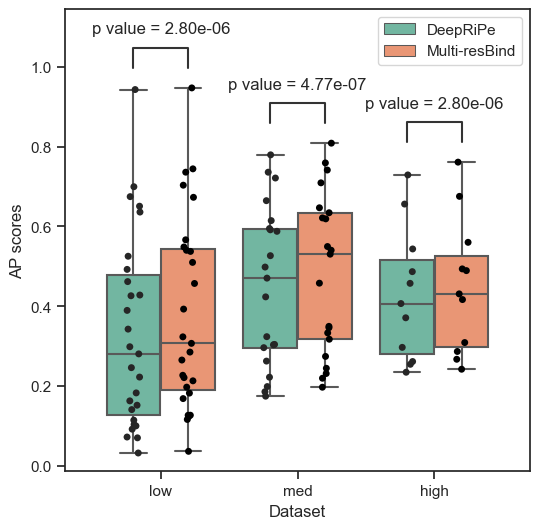

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
fig = plt.figure(figsize=(6, 6))
plt.style.use('default')
sns.set(style='ticks')
sns.set_palette('Set2')
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='Dataset', y='value', data=df_AP, hue='Model', showfliers=False, palette='Set2', ax=ax)
sns.stripplot(x='Dataset', y='value', data=df_AP, hue='Model', dodge=True, jitter=True, color='black', ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2])
ax.set_xlabel('Dataset')
ax.set_ylabel('AP scores')
box_pairs=[
    (("low", "DeepRiPe"), ("low", "Multi-resBind")),
    (("med", "DeepRiPe"), ("med", "Multi-resBind")),
    (("high", "DeepRiPe"), ("high", "Multi-resBind")),
    ]
add_stat_annotation(ax, x='Dataset', y='value', data=df_AP, hue='Model', box_pairs=box_pairs,
                    text_annot_custom=["p value = 2.80e-06", "p value = 4.77e-07", "p value = 2.80e-06"],
                    perform_stat_test=False, pvalues=[0, 0, 0],
                    loc='inside', line_offset_to_box=0.05, line_offset=0, line_height=0.05, text_offset=8,
                    verbose=2)
#plt.show()
plt.savefig('AP_graph.eps', format='eps',bbox_inches='tight')
#f.savefig("AP_graph.pdf", bbox_inches='tight')

In [45]:
df_AUROC_med = pd.DataFrame(np.zeros(num_task_med*4).reshape(num_task_med,4),
                  columns=['RBPnames','Dataset','DeepRiPe', 'Multi-resBind'])
df_AUROC_med.loc[:, 'RBPnames'] = RBPnames_med
df_AUROC_med.loc[:, 'Dataset'] = "med"
df_AUROC_med.loc[:, 'DeepRiPe'] = roc_auc_deepripe_med
df_AUROC_med.loc[:, 'Multi-resBind'] = roc_auc_resbind_med
#df = df_AP.melt(id_vars=['RBPnames'])
df_AUROC_med.head ()

,RBPnames,Dataset,DeepRiPe,Multi-resBind
0,TARDBP,med,0.954223,0.959979
1,ELAVL2,med,0.928077,0.935974
2,ELAVL3,med,0.944168,0.950575
3,ELAVL4,med,0.935299,0.941988
4,RBM20,med,0.910829,0.923676


In [46]:
df_AUROC_low = pd.DataFrame(np.zeros(num_task_low*4).reshape(num_task_low,4),
                  columns=['RBPnames','Dataset','DeepRiPe', 'Multi-resBind'])
df_AUROC_low.loc[:, 'RBPnames'] = RBPnames_low
df_AUROC_low.loc[:, 'Dataset'] = "low"
df_AUROC_low.loc[:, 'DeepRiPe'] = roc_auc_deepripe_low
df_AUROC_low.loc[:, 'Multi-resBind'] = roc_auc_resbind_low
df_AUROC_low.head ()

,RBPnames,Dataset,DeepRiPe,Multi-resBind
0,MBNL1,low,0.982971,0.985105
1,P53_NONO,low,0.919594,0.940176
2,PUM2,low,0.948727,0.954308
3,QKI,low,0.974170,0.982582
4,AGO3,low,0.875201,0.888198


In [47]:
df_AUROC_high = pd.DataFrame(np.zeros(num_task_high*4).reshape(num_task_high,4),
                  columns=['RBPnames','Dataset','DeepRiPe', 'Multi-resBind'])
df_AUROC_high.loc[:, 'RBPnames'] = RBPnames_high
df_AUROC_high.loc[:, 'Dataset'] = "high"
df_AUROC_high.loc[:, 'DeepRiPe'] = roc_auc_deepripe_high
df_AUROC_high.loc[:, 'Multi-resBind'] = roc_auc_resbind_high
df_AUROC_high.head ()

,RBPnames,Dataset,DeepRiPe,Multi-resBind
0,DND1,high,0.820096,0.837184
1,CPSF7,high,0.793721,0.805413
2,CPSF6,high,0.784461,0.793751
3,CPSF1,high,0.771746,0.778777
4,CSTF2,high,0.813123,0.824217


In [ ]:
import scipy.stats as stats
data1 = df_AUROC_low.loc[:, 'DeepRiPe']
data2 = df_AUROC_low.loc[:, 'Multi-resBind']
stat, p = stats.wilcoxon(data1, data2, alternative='less')
print("pvalues:", '%.2e' %p)
data3 = df_AUROC_med.loc[:, 'DeepRiPe']
data4 = df_AUROC_med.loc[:, 'Multi-resBind']
stat, p = stats.wilcoxon(data3, data4, alternative='less')
print("pvalues:", '%.2e' %p)
data3 = df_AUROC_high.loc[:, 'DeepRiPe']
data4 = df_AUROC_high.loc[:, 'Multi-resBind']
stat, p = stats.wilcoxon(data1, data2, alternative='less')
print("pvalues:", '%.2e' %p)

In [ ]:
# plotting the performance comparison of Fig.2 (a)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

med_DeepRiPe v.s. med_Multi-resBind: Custom statistical test, P_val:0.000e+00
low_DeepRiPe v.s. low_Multi-resBind: Custom statistical test, P_val:0.000e+00
high_DeepRiPe v.s. high_Multi-resBind: Custom statistical test, P_val:0.000e+00


2021-03-24 21:20:44,988 [WARNING] The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2021-03-24 21:20:44,988 [WARNING] The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


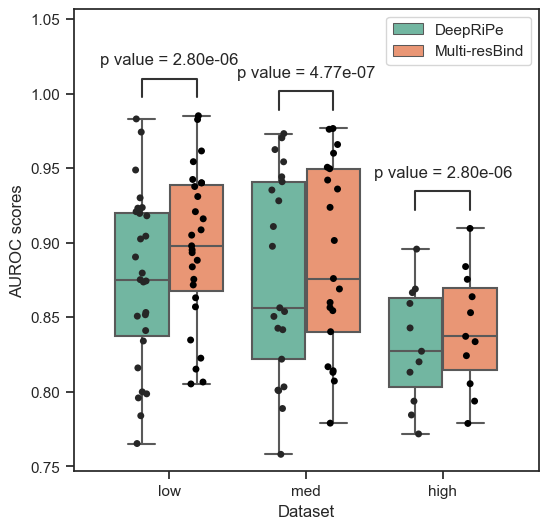

In [94]:
fig = plt.figure(figsize=(6, 6))
plt.style.use('default')
sns.set(style='ticks')
sns.set_palette('Set2')
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='Dataset', y='value', data=df_AUROC, hue='Model', showfliers=False, palette='Set2', ax=ax)
sns.stripplot(x='Dataset', y='value', data=df_AUROC, hue='Model', dodge=True, jitter=True, color='black', ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2])
ax.set_xlabel('Dataset')
ax.set_ylabel('AUROC scores')
box_pairs=[
    (("low", "DeepRiPe"), ("low", "Multi-resBind")),
    (("med", "DeepRiPe"), ("med", "Multi-resBind")),
    (("high", "DeepRiPe"), ("high", "Multi-resBind")),
    ]
ax.set_xlabel('Dataset')
ax.set_ylabel('AUROC scores')
add_stat_annotation(ax, x='Dataset', y='value', data=df_AUROC, hue='Model', box_pairs=box_pairs,
                    text_annot_custom=["p value = 2.80e-06", "p value = 4.77e-07", "p value = 2.80e-06"],
                    perform_stat_test=False, pvalues=[0, 0, 0],
                    loc='inside', comparisons_correction=None,
                    line_offset_to_box=0.05, line_offset=0, line_height=0.05, text_offset=8,
                    verbose=2)
#plt.show()
plt.savefig('AUROC_graph.eps', format='eps',bbox_inches='tight')
#f.savefig("AP_graph.pdf", bbox_inches='tight')text_annot_custom=["first pair", "second pair", "third pair"],

In [ ]:
# code for plot performance comparison of Fig.2 (c)

In [ ]:
df_AUROC_2 = pd.concat([df_AUROC_low,df_AUROC_med,df_AUROC_high])
plt.figure(figsize=(6, 6))
plt.style.use('default')
sns.set()
sns.set(style='ticks')
lineStart = 0.5
lineEnd = 1
sns.lmpl1 ot( x="DeepRiPe", y="Multi-resBind", data=df_AUROC_2, fit_reg=False, hue='Dataset', legend=True, palette="Set1")
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'black')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('AUROC values')
#plt.show()
plt.savefig('scatter_AUROC_graph.eps', format='eps',bbox_inches="tight")

In [ ]:
# code for plot performance comparison of Fig.2 (d)

In [ ]:
df_AP_2 = pd.concat([df_AP_low,df_AP_med,df_AP_high])
plt.figure(figsize=(6, 6))
plt.style.use('default')
sns.set()
sns.set(style='ticks')
lineStart = 0
lineEnd = 1
sns.lmplot(x="DeepRiPe", y="Multi-resBind", data=df_AP_2, fit_reg=False, hue='Dataset', legend=True, palette="Set1")
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'black')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('AP values')
#plt.show()
plt.savefig('scatter_AP_graph.eps', format='eps',bbox_inches="tight")

In [ ]:
# code for plot Fig.4 of ELAVL2 and CSTF2

In [ ]:
igres_resbind= integrated_gradients(model_resbind_med)
RBPnames = RBPnames_med
pred= pred_resbind_med
igres = igres_resbind
RBPname = "ELAVL2"

In [ ]:
X_test_seq = X_test_seq_med
X_test_region = X_test_region_med
y_test_RBP = y_test_RBP_med
e = concat_med

In [ ]:
RBP_index = np.where(RBPnames == RBPname)[0][0]
print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:1]
print (pred[ind,RBP_index])
print (ind)
ref_ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                      reverse=False) if y_test_RBP[i[0], RBP_index] == 0][0:2000]
#print (ref_ind)
ref = np.mean(e[ref_ind], axis=0)
print (ref.shape)
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=ref) for i in ind])
print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
print (seq_log.shape)

In [ ]:
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,:,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,2), ncol=1)
plt.show()

In [ ]:
i = 0
intron = seq_log[i,:,4]
CDS = seq_log[i,:,5]
UTR1 = seq_log[i,:,6]
UTR2 = seq_log[i,:,7]
N = 150
ind = np.arange(N) # the x locations for the groups
width = 1
fig = plt.figure(figsize=(8,2))
ax1 = plt.subplot(2, 1, 1)
seqlogo(np.transpose(seq_log[:, :, :4], axes=(1, 2, 0)), "RNA", ax1)
ax2 = plt.subplot(2, 1, 2)
ax2.bar(ind, intron, width, color='r')
ax2.bar(ind, CDS, width, color='b')
ax2.bar(ind, UTR1, width, color='g')
ax2.bar(ind, UTR2, width, color='y')
ax2.legend(labels=['intron', 'CDS','3_UTR','5_UTR'],fontsize=8)
ax2.grid(False)
ax2.set_xticks([],[])
ax2.set_xlim( - 1,N + 1)
ax2.yaxis.set_tick_params(labelsize=8)
ax2.set_aspect(aspect='auto', adjustable='box')
ax2.autoscale_view()
fig.suptitle('ELAVL2', fontsize=12)
#plt.show()
plt.savefig('ELAVL2_seq_region_contribution_map.eps', format='eps',bbox_inches='tight')

In [ ]:
igres_resbind= integrated_gradients(model_resbind_high)
RBPnames = RBPnames_high
pred= pred_resbind_high
igres = igres_resbind
RBPname = "CSTF2"

In [ ]:
X_test_seq = X_test_seq_high
X_test_region = X_test_region_high
y_test_RBP = y_test_RBP_high
e = concat_high

In [ ]:
RBP_index = np.where(RBPnames == RBPname)[0][0]
print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:1]
print (pred[ind,RBP_index])
print (ind)
ref_ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                      reverse=False) if y_test_RBP[i[0], RBP_index] == 0][0:2000]
#print (ref_ind)
ref = np.mean(e[ref_ind], axis=0)
print (ref.shape)
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=ref) for i in ind])
print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
print (seq_log.shape)

In [ ]:
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,:,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()

In [ ]:
i = 0
intron = seq_log[i,:,4]
CDS = seq_log[i,:,5]
UTR1 = seq_log[i,:,6]
UTR2 = seq_log[i,:,7]
N = 150
ind = np.arange(N) # the x locations for the groups
width = 1
fig = plt.figure(figsize=(8,2))
ax1 = plt.subplot(2, 1, 1)
seqlogo(np.transpose(seq_log[:, :, :4], axes=(1, 2, 0)), "RNA", ax1)
ax2 = plt.subplot(2, 1, 2)
ax2.bar(ind, intron, width, color='r')
ax2.bar(ind, CDS, width, color='b')
ax2.bar(ind, UTR1, width, color='g')
ax2.bar(ind, UTR2, width, color='y')
ax2.legend(labels=['intron', 'CDS','3_UTR','5_UTR'],fontsize=8)
ax2.grid(False)
ax2.set_xticks([],[])
ax2.set_xlim( - 1,N + 1)
ax2.yaxis.set_tick_params(labelsize=8)
ax2.set_aspect(aspect='auto', adjustable='box')
ax2.autoscale_view()
fig.suptitle('CSTF2', fontsize=12)
#plt.show()
plt.savefig('CSTF2_seq_region_contribution_map.eps', format='eps',bbox_inches='tight')

In [ ]:
# code for plot Fig.3 of MBNL1, PUM2 and QKI

In [ ]:
igres_resbind= integrated_gradients(model_resbind_low)
RBPnames = RBPnames_low
pred= pred_resbind_low
igres = igres_resbind

In [ ]:
X_test_seq = X_test_seq_low
X_test_region = X_test_region_low
y_test_RBP = y_test_RBP_low
e = concat_low

In [ ]:
RBPname = "MBNL1"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
#print (pred[ind,RBP_index])
#print (ind)
ref_ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                      reverse=False) if y_test_RBP[i[0], RBP_index] == 0][0:2000]
#print (ref_ind)
ref = np.mean(e[ref_ind], axis=0)
#print (ref.shape)
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=ref) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
#plt.show()
plt.savefig('MBNL1_contribution_map_negative.eps', format='eps',bbox_inches='tight')

In [ ]:
RBPname = "PUM2"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
#print (pred[ind,RBP_index])
#print (ind)
ref_ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                      reverse=False) if y_test_RBP[i[0], RBP_index] == 0][0:2000]
#print (ref_ind)
ref = np.mean(e[ref_ind], axis=0)
#print (ref.shape)
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=ref) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
#plt.show()
plt.savefig('PUM2_contribution_map_negative.eps', format='eps',bbox_inches='tight')

In [ ]:
RBPname = "QKI"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][0:3]
#print (pred[ind,RBP_index])
#print (ind)
ref_ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                      reverse=False) if y_test_RBP[i[0], RBP_index] == 0][0:2000]
#print (ref_ind)
ref = np.mean(e[ref_ind], axis=0)
#print (ref.shape)
ex_seq = np.array([igres.explain(e[i], outc=RBP_index, reference=ref) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, e[ind])
#print (seq_log.shape)
plt.close("all")
seqlogo_fig(np.transpose(seq_log[:,50:100,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
#plt.show()
plt.savefig('QKI_contribution_map_negative.eps', format='eps',bbox_inches='tight')